## **Parte Teórica**

# 1. Bucles de retroalimentación

## 1.a Crecimiento exponencial (bucle de refuerzo)
Un **bucle de refuerzo** es aquel en el que la salida del sistema se realimenta de forma positiva, amplificando el cambio inicial.  
- **Por ejemplo** población $P$ con tasa de crecimiento proporcional al tamaño actual.  
  - Flujo: $\text{nacimientos} = r\,P$  
  - Ecuación diferencial:  
    $$\frac{dP}{dt} = r\,P$$  
  - Cada nueva unidad de población genera más nacimientos, acelerando el crecimiento de forma **exponencial**.

## 1.b Equilibrio (bucle de equilibrio)
Un **bucle de equilibrio** introduce una realimentación negativa: la salida actúa contrarrestando el cambio inicial para acercar el sistema a un valor de referencia o meta.  
- **Por ejemplo:** termostato controlando la temperatura $T$.  
  - Stock: temperatura ambiente $T$  
  - Meta: temperatura objetivo $T_{\text{ref}}$  
  - Flujo de calefacción:  
    $$Q = k\,(T_{\text{ref}} - T)$$  
  - Cuando $T < T_{\text{ref}}$, $Q>0$ calienta; si $T > T_{\text{ref}}$, $Q<0$ enfría.  
  - El bucle reduce continuamente la diferencia $(T_{\text{ref}} - T)$, manteniendo el **equilibrio**.

---

# 2. Modelo epidémico SIR

El modelo SIR divide a la población en tres **stocks** y describe los **flujos** entre ellos.

## 2.a Etiquetado de stocks y flujos

- **Stocks**  
  - **S**: Susceptibles (personas que aún pueden infectarse)  
  - **I**: Infectados (personas actualmente contagiadas y transmisoras)  
  - **R**: Recuperados (o removidos; ya no participan en la transmisión)

- **Flujos**  
  1. **Infección**  
     $$\text{flujo}_{S\to I} = \beta\,S\,I$$  
     Tasa a la que susceptibles se infectan al contacto con infectados.  
  2. **Recuperación**  
     $$\text{flujo}_{I\to R} = \gamma\,I$$  
     Tasa a la que los infectados dejan de ser transmisores (recuperados o fallecidos).

## 2.b Bucles de retroalimentación que rigen la infección

1. **Bucle reforzador de infección**  
   - **Camino:**  
     $I \xrightarrow{\beta S I} I$  
   - Más infectados $\Rightarrow$ más contactos $\Rightarrow$ más nuevas infecciones $\Rightarrow$ aún más infectados.

2. **Bucle equilibrante de recuperación**  
   - **Camino:**  
     $I \xrightarrow{\gamma I} R$  
   - A medida que crece $I$, aumenta el flujo de recuperación, reduciendo la cantidad de infectados y frenando la epidemia.

---

# 3. Por qué los sistemas no lineales requieren simulación numérica

Cuando un flujo depende de productos de variables (por ejemplo, $\beta\,S\,I$) el sistema de ecuaciones diferenciales resultante es **no lineal**. En la práctica:

1. **Acoplamiento entre variables**  
   - El término $\beta\,S\,I$ mezcla dos stocks, de modo que la tasa de cambio de uno depende del valor instantáneo del otro.

2. **Imposibilidad de solución analítica sencilla**  
   - Salvo casos muy simplificados, no existe una fórmula cerrada para $S(t), I(t), R(t)$.  
   - La no linealidad impide separar variables en integrales elementales.

3. **Necesidad de métodos numéricos**  
   - Se usan algoritmos de integración paso a paso (por ejemplo, **Euler**, **Runge–Kutta**).  
   - Estos métodos aproximan la evolución en pequeños intervalos $\Delta t$, actualizando los valores de $S$, $I$ y $R$ iterativamente.

 


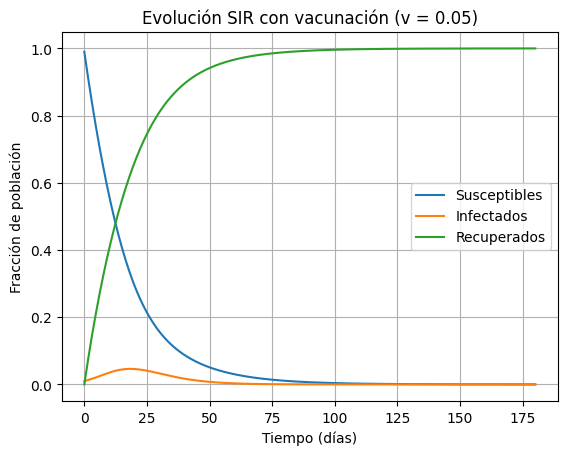

v = 0.000 → Pico de infectados: 0.3097
v = 0.010 → Pico de infectados: 0.2042
v = 0.020 → Pico de infectados: 0.1308
v = 0.030 → Pico de infectados: 0.0860
v = 0.040 → Pico de infectados: 0.0607
v = 0.050 → Pico de infectados: 0.0462
v = 0.060 → Pico de infectados: 0.0375
v = 0.070 → Pico de infectados: 0.0319
v = 0.080 → Pico de infectados: 0.0281
v = 0.090 → Pico de infectados: 0.0253
v = 0.100 → Pico de infectados: 0.0233


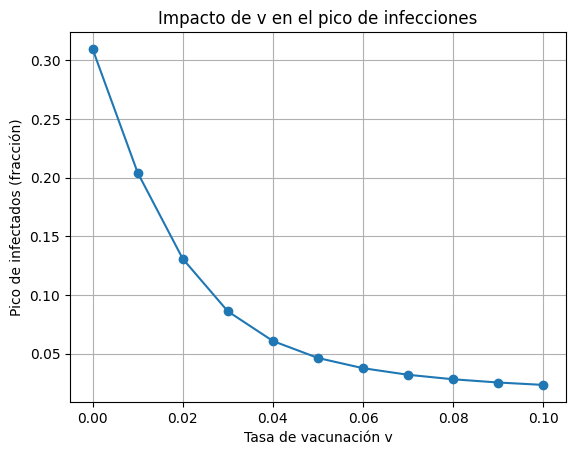

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
beta = 0.3    # tasa de infección
gamma = 0.1   # tasa de recuperación
dt = 0.5      # paso de tiempo (días)
t_max = 180   # duración de la simulación (días)

# Condiciones iniciales
S0 = 0.99
I0 = 0.01
R0 = 0.0

def simulate_sir_vaccination(beta, gamma, v, S0, I0, R0, dt, t_max):
    n_steps = int(t_max / dt) + 1
    t = np.linspace(0, t_max, n_steps)
    S = np.zeros(n_steps)
    I = np.zeros(n_steps)
    R = np.zeros(n_steps)
    S[0], I[0], R[0] = S0, I0, R0
    for i in range(1, n_steps):
        dS = -beta * S[i-1] * I[i-1] - v * S[i-1]
        dI =  beta * S[i-1] * I[i-1] - gamma * I[i-1]
        dR =  gamma * I[i-1] + v * S[i-1]
        S[i] = S[i-1] + dS * dt
        I[i] = I[i-1] + dI * dt
        R[i] = R[i-1] + dR * dt
    return t, S, I, R

# 1) Simulación para v = 0.05
v = 0.05
t, S, I, R = simulate_sir_vaccination(beta, gamma, v, S0, I0, R0, dt, t_max)

# Gráfica de S(t), I(t) y R(t)
plt.figure()
plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tiempo (días)')
plt.ylabel('Fracción de población')
plt.title(f'Evolución SIR con vacunación (v = {v})')
plt.legend()
plt.grid(True)
plt.show()

# 2) Variación de v y cálculo del pico de infectados
v_values = np.linspace(0, 0.1, 11)
peak_infections = []

for v_i in v_values:
    _, _, I_i, _ = simulate_sir_vaccination(beta, gamma, v_i, S0, I0, R0, dt, t_max)
    peak_infections.append(np.max(I_i))

# Imprimir resultados de picos de infectados
for v_i, peak in zip(v_values, peak_infections):
    print(f"v = {v_i:.3f} → Pico de infectados: {peak:.4f}")

# Gráfica del impacto de v en el pico de infecciones
plt.figure()
plt.plot(v_values, peak_infections, marker='o')
plt.xlabel('Tasa de vacunación v')
plt.ylabel('Pico de infectados (fracción)')
plt.title('Impacto de v en el pico de infecciones')
plt.grid(True)
plt.show()


## a. ¿Cómo altera la vacunación los ciclos de retroalimentación?

1. **Debilita el lazo de retroalimentación positivo (infección):**  
   Menor fracción de susceptibles ($S$) reduce el término de infección  
   $$\beta\,S\,I$$  
   con lo cual la generación de nuevos casos se aplana.

2. **Refuerza el lazo de retroalimentación negativo (recuperación + vacunación):**  
   La vacunación introduce un flujo adicional  
   $$v\,S$$  
   hacia la población recuperada/inmunizada ($R$), junto con la recuperación natural  
   $$\gamma\,I$$  
   acelerando la disminución de infectados.

3. **Retraso y reducción del pico de infectados:**  
   A mayor $v$, el pico de $I(t)$ se adelanta levemente (por la caída más rápida de $S$) y su magnitud cae drásticamente (de ~0.31 a ~0.02).

---

## b. ¿Cuál es el valor mínimo de $v$ para prevenir un brote?

Para que no haya crecimiento de la epidemia se requiere  
$$
R_{\rm eff} = \frac{\beta}{\gamma + v} < 1
$$

Resolviendo:
$$
\frac{0.3}{0.1 + v} < 1
\quad\Longrightarrow\quad
v > 0.3 - 0.1 = 0.2
$$

Por tanto, **$v\gtrsim0.20$ (20 % diario)** es el umbral mínimo que evita que $R_{\rm eff}$ supere 1 y previene un brote.  
En la simulación con $v\le0.10$ siempre hubo un pico $I> I_0$, por lo que ningún valor hasta 0.10 bastó para eliminar el brote.  
